In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# load the data
df = pd.read_csv('../input/mushrooms.csv')


In [2]:
# There are no null columns in the dataset
df[df.isnull().any(axis=1)]

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat


In [3]:
from sklearn.model_selection import train_test_split


# split the data int x(training data) and y (results)
y = df['class']
x = df.drop(['class'], axis=1)
x = pd.get_dummies(x)
y = pd.get_dummies(y)
x.info()
y.info()
# x.info()
# y.info()
# x.dtypes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Columns: 117 entries, cap-shape_b to habitat_w
dtypes: uint8(117)
memory usage: 928.3 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 2 columns):
e    8124 non-null uint8
p    8124 non-null uint8
dtypes: uint8(2)
memory usage: 15.9 KB


In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


# df['habitat_cat'] = df['habitat'].cat.codes
# df['class_cat'] = df['class'].cat.codes
# df.dtypes
# df['habitat_cat'].unique()
# sns.stripplot(x='class', y='habitat_cat', data=df, jitter=True)

In [5]:
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

parameters = {'criterion':('gini', 'entropy'), 
              'min_samples_split':[2,3,4,5], 
              'max_depth':[9,10,11,12],
              'class_weight':('balanced', None),
              'presort':(False,True),
             }


tr = tree.DecisionTreeClassifier()
gsearch = GridSearchCV(tr, parameters)
gsearch.fit(X_train, y_train)
model = gsearch.best_estimator_
model
# gsearch.cv_results_
# scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1_macro')
# scores
# model.fit(X_train, y_train)


DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [6]:
# The scores are really great, so fit the model and predict
# model.fit(X_train, y_train)
score = model.score(X_test, y_test)
score

1.0

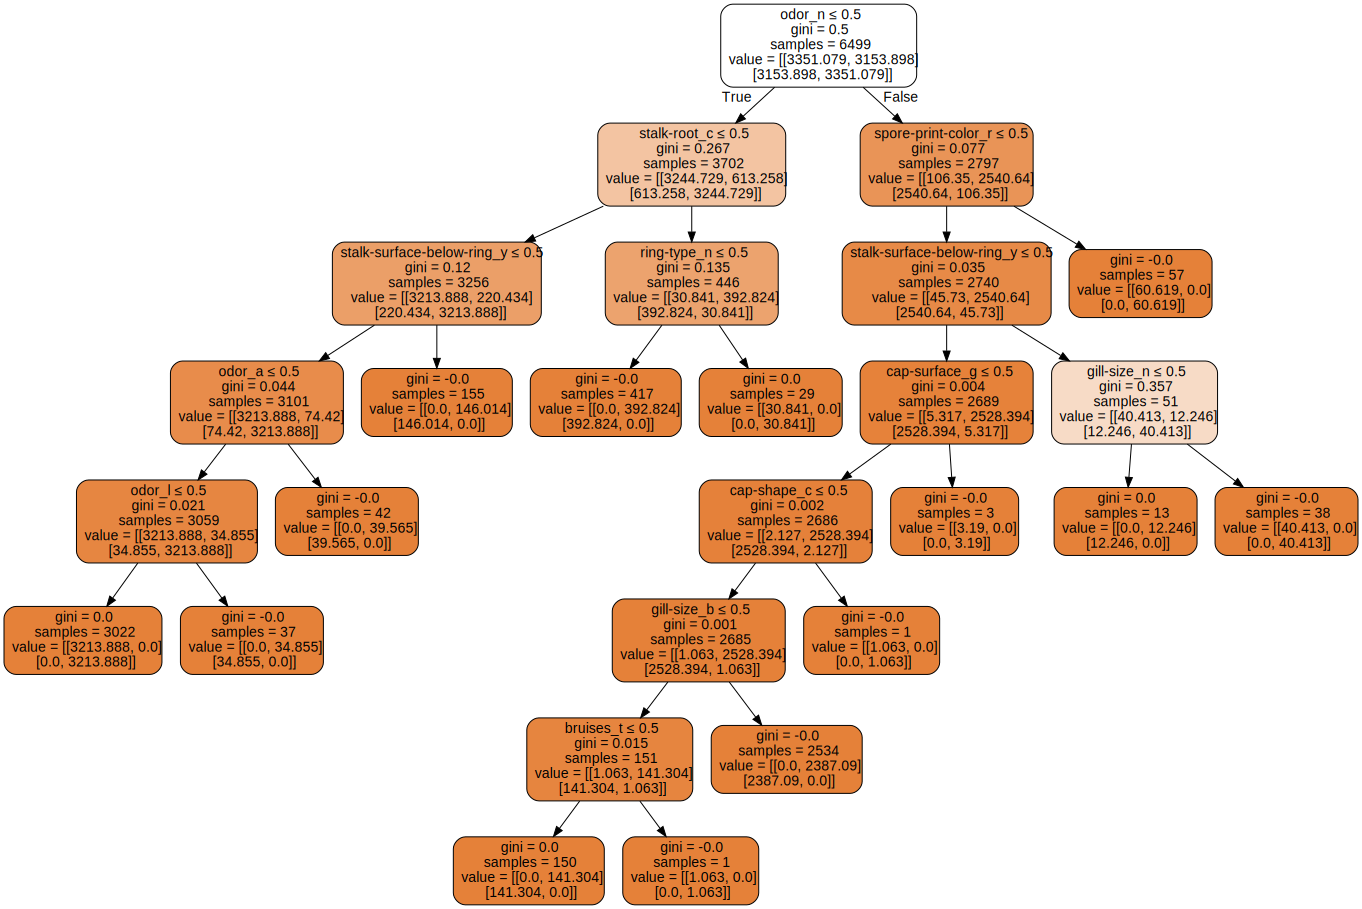

In [7]:
import graphviz
dot_data = tree.export_graphviz(model, out_file=None,
                                feature_names=X_test.columns,
                               class_names=y_test.columns,
                               filled=True, rounded=True,
                               special_characters=True)
graph = graphviz.Source(dot_data)
graph